# Net Present Value (NPV) - Examples

In [2]:
import pandas as pd

%matplotlib inline

## PV Example

In [17]:
lifetime = 20 #years
discount_rate = 0.04 #0.0775 #per unit
size = 100 #kW
specific_cost = 800 #EUR/kW
fom = 20 #EUR/kW/a
fit = 0.1 #EUR/kWh
flh = 1000 #h/a
flows = pd.DataFrame(index=range(lifetime+1))
flows["investment"] = [-size*specific_cost] + [0]*lifetime
flows["FOM"] = [0] + [-size*fom]*lifetime
flows["income"] = [0] + [size*flh*fit]*lifetime
flows["total_flow"] = flows.sum(axis=1)
flows["discount_factor"] = [(1+discount_rate)**(-t) for t in range(lifetime+1)]
flows["discounted_total_flow"] = flows["total_flow"]*flows["discount_factor"]

In [18]:
flows.head()

investment   FOM   income  total_flow  discount_factor  \
0      -80000     0      0.0    -80000.0         1.000000   
1           0 -2000  10000.0      8000.0         0.961538   
2           0 -2000  10000.0      8000.0         0.924556   
3           0 -2000  10000.0      8000.0         0.888996   
4           0 -2000  10000.0      8000.0         0.854804   

   discounted_total_flow  
0          -80000.000000  
1            7692.307692  
2            7396.449704  
3            7111.970869  
4            6838.433528

In [19]:
flows.sum()

investment               -80000.000000
FOM                      -40000.000000
income                   200000.000000
total_flow                80000.000000
discount_factor              14.590326
discounted_total_flow     28722.610760
dtype: float64

In [9]:
(size*specific_cost/(sum(flows["discount_factor"])-1)+2500)/1e5

0.6650050203417118

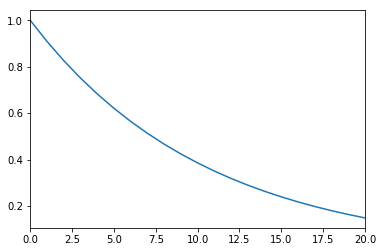

In [8]:
flows["discount_factor"].plot()

## Nuclear Example

In [23]:
lifetime = 40 #years
discount_rate = 0.10 #per unit
size = 3e6 #kW
specific_cost = 5000 #EUR/kW
decommissioning_cost = 0 #EUR/kW
fom = 20 #EUR/kW/a
fuel = 10 #EUR/MWh
market_value = 50 #EUR/MWh
flh = 8000 #h/a
flows = pd.DataFrame(index=range(lifetime+1))
flows["investment"] = [-size*specific_cost] + [0]*(lifetime-1) + [-size*decommissioning_cost]
flows["FOM"] = [0] + [-size*fom]*lifetime
flows["income"] = [0] + [size*flh*market_value/1000]*lifetime
flows["total_flow"] = flows.sum(axis=1)
flows["discount_factor"] = [(1+discount_rate)**(-t) for t in range(lifetime+1)]
flows["discounted_total_flow"] = flows["total_flow"]*flows["discount_factor"]

In [24]:
flows.head()

investment         FOM        income    total_flow  discount_factor  \
0 -1.500000e+10         0.0  0.000000e+00 -1.500000e+10         1.000000   
1  0.000000e+00 -60000000.0  1.200000e+09  1.140000e+09         0.909091   
2  0.000000e+00 -60000000.0  1.200000e+09  1.140000e+09         0.826446   
3  0.000000e+00 -60000000.0  1.200000e+09  1.140000e+09         0.751315   
4  0.000000e+00 -60000000.0  1.200000e+09  1.140000e+09         0.683013   

   discounted_total_flow  
0          -1.500000e+10  
1           1.036364e+09  
2           9.421488e+08  
3           8.564989e+08  
4           7.786353e+08

In [25]:
flows.sum()

investment              -1.500000e+10
FOM                     -2.400000e+09
income                   4.800000e+10
total_flow               3.060000e+10
discount_factor          1.077905e+01
discounted_total_flow   -3.851882e+09
dtype: float64